# Doğrusal Olmayan Regreson Modelleri

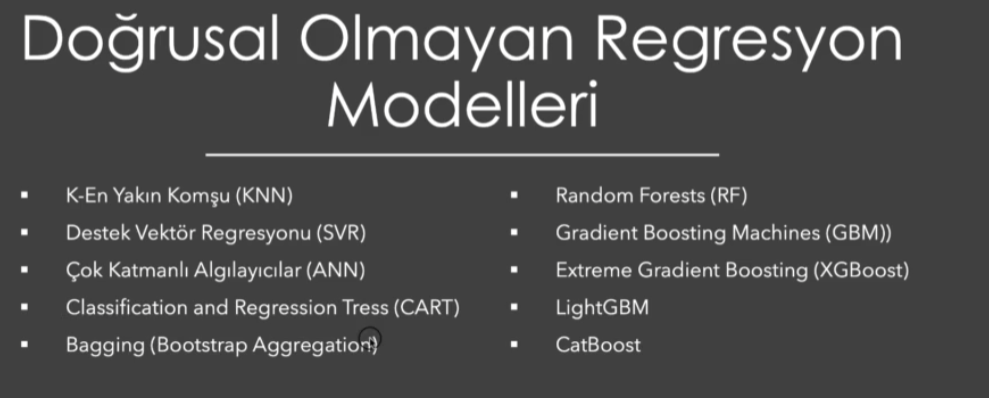

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

    Tahminler gözlem benzerliğine göre yapılır 
    K-Nearest Neighbors (KNN), örnek tabanlı bir makine öğrenme algoritmasıdır. Bu algoritma, sınıflandırma ve regresyon problemlerini çözmek için kullanılır. Temel fikir, bir veri noktasını çevresindeki k-en yakın komşusuna dayanarak sınıflandırmak veya tahmin yapmaktır.

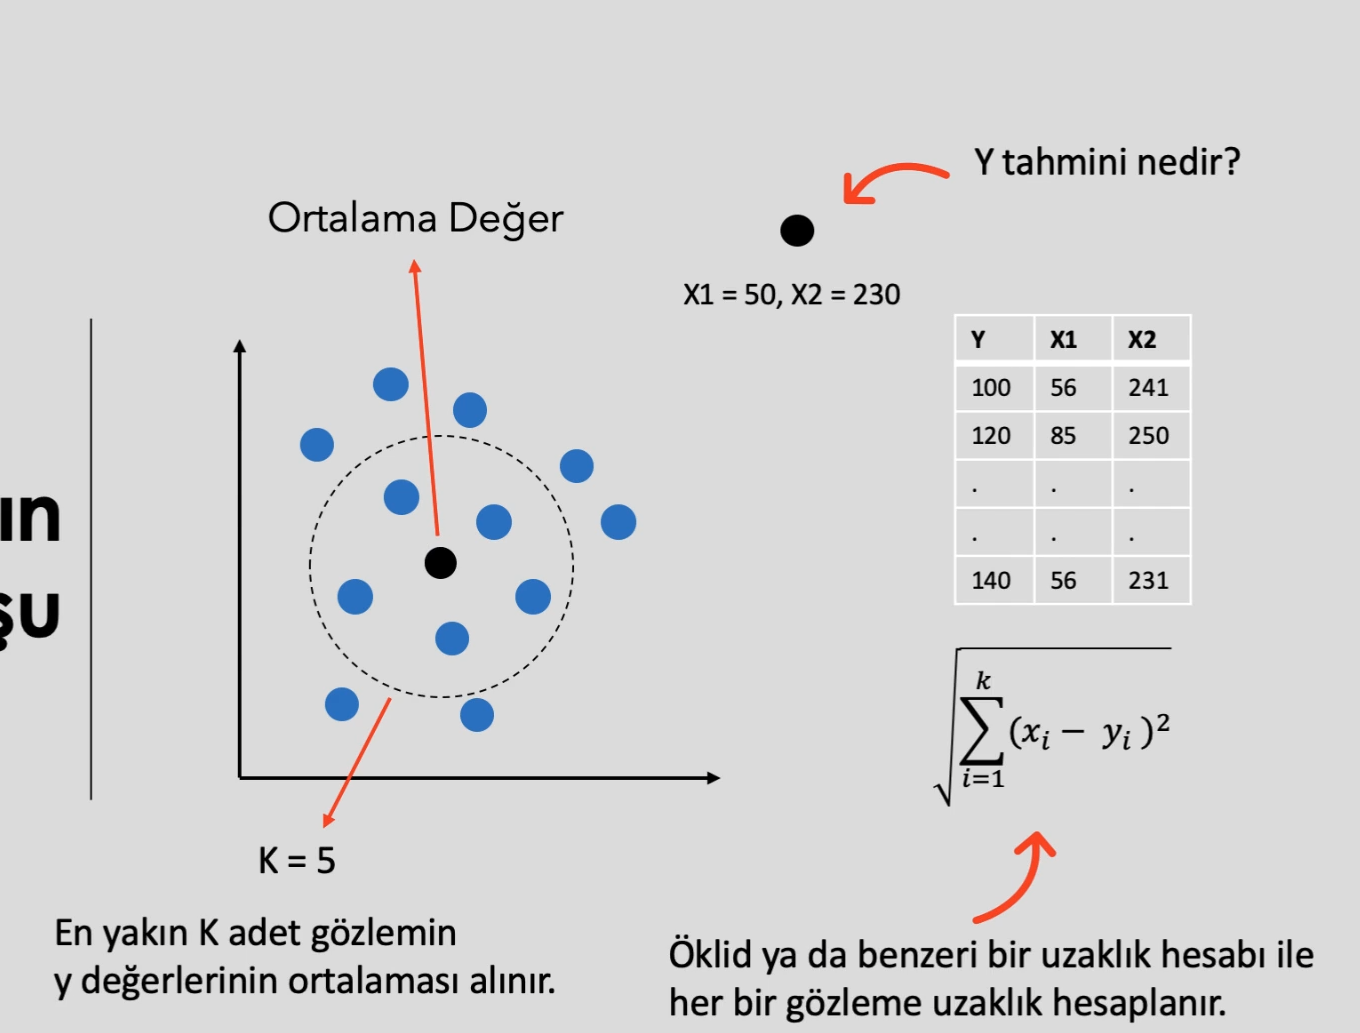 
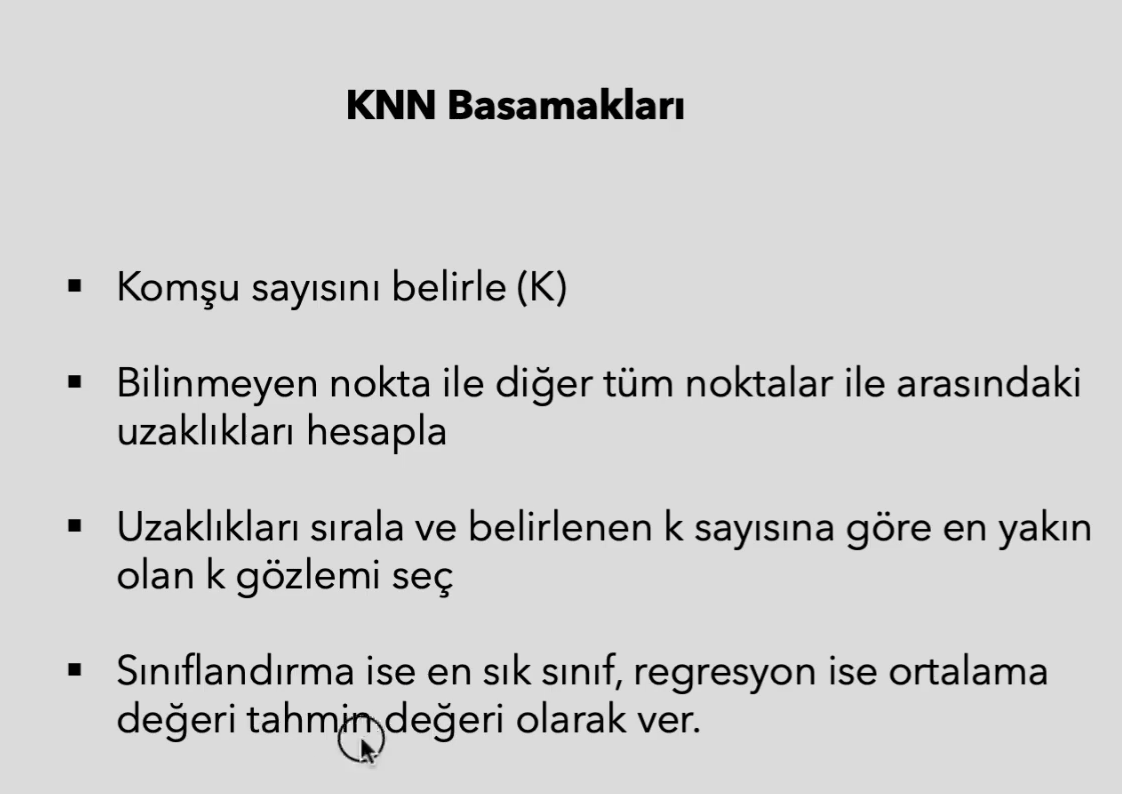

## Model 

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
knn_model.n_neighbors

5

## Tahmin  

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [10]:
RMSE = []

for k in range(10):
    k= k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k =", k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tunning

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_params = {"n_neighbors":np.arange(1,30,1)}

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn_cv_model = GridSearchCV(knn, knn_params,cv =10)

In [15]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
knn_cv_model.best_params_["n_neighbors"]

8

In [18]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [19]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [20]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [21]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# SVR (Destek Vektör Regresyonu)

Amaç bir marjin arqalığına maksimum noktayı en küçük hata alabilecek şekilde doğru ya da eğriyi belirlemektir

Robust bir yapıdadır (aykırılıklara dayanıklı)

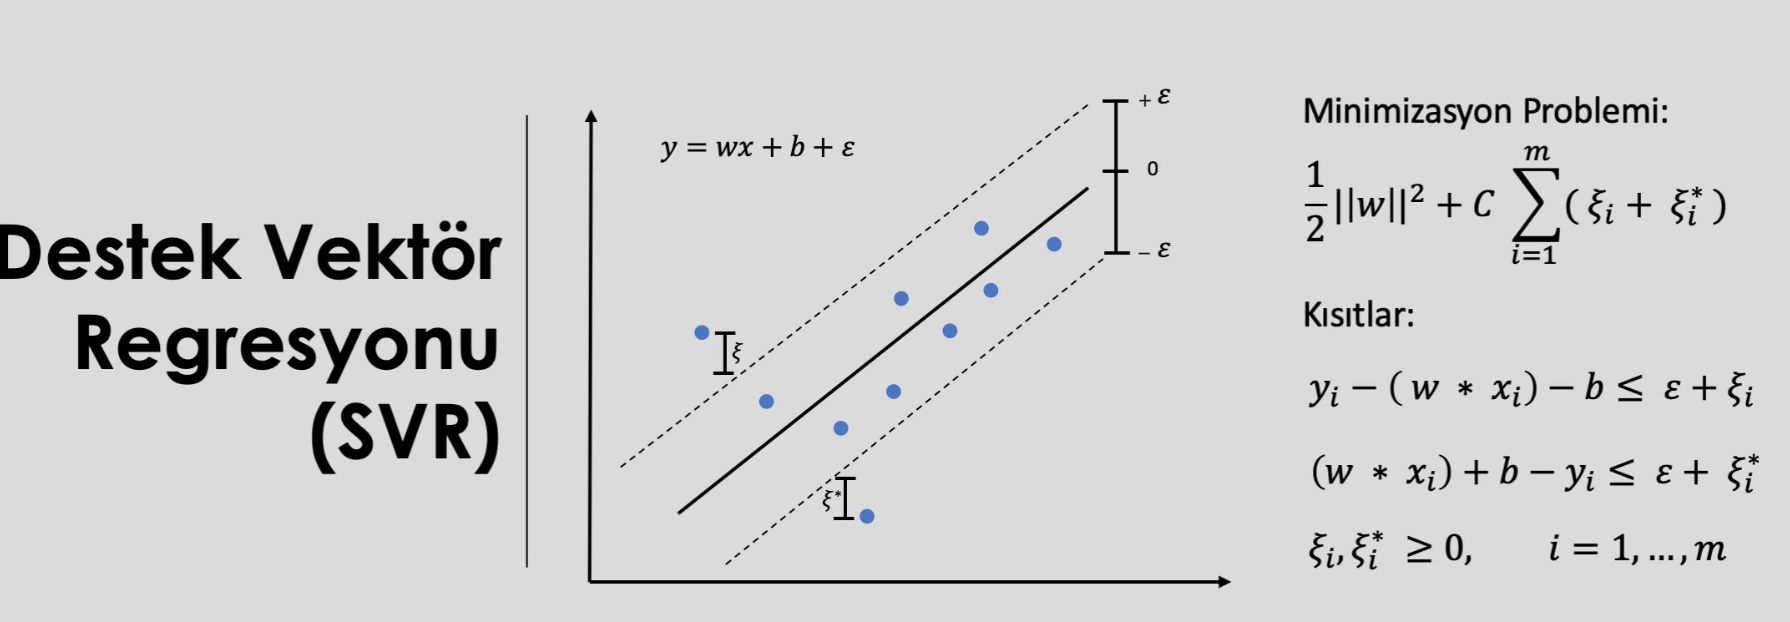

Destek Vektör Regresyonu (SVR), makine öğrenmesinde regresyon problemlerini çözmek için kullanılan bir algoritmadır. SVR, destek vektör makinelerinin regresyon versiyonudur ve özellikle non-lineer regresyon problemlerine uygundur. Temel amacı, veri noktalarını bir hiperdüzlem etrafında bir tolerans aralığında sıralamak ve regresyon hatasını minimize etmektir. Bu tolerans aralığı, modelin hatasına katlanılabilir bir düzeyi belirtir. SVR, özellikle yüksek boyutlu veri setlerinde ve non-lineer ilişkilerin bulunduğu durumlarda etkilidir. Algoritma, veri noktalarını destek vektörleri olarak kullanır ve bu destek vektörleri üzerinden regresyon hiperdüzlemi oluşturarak tahminler yapar.

In [53]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [23]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [24]:
from sklearn.svm import SVR

In [28]:
svr_model = SVR(kernel='linear').fit(X_train, y_train)

In [29]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [30]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [31]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [32]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [33]:
y_pred = svr_model.predict(X_train)

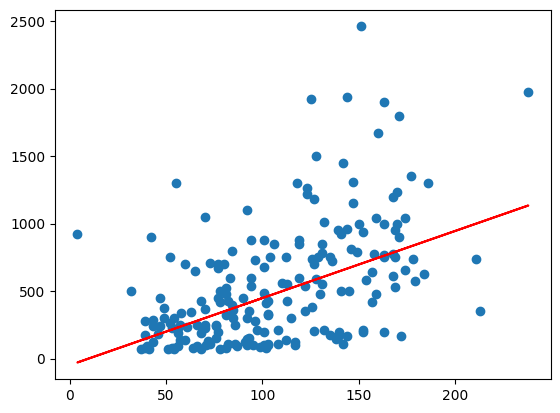

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [35]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [36]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

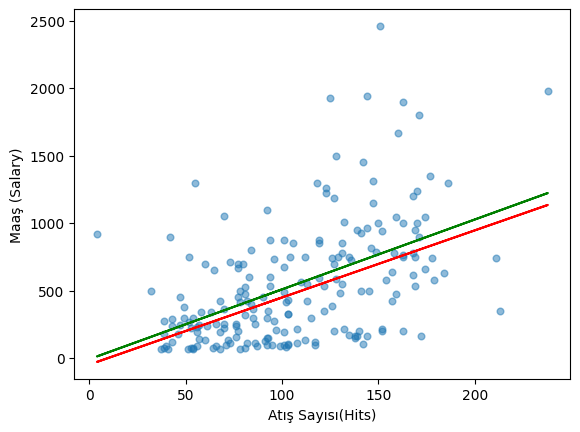

In [37]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

SVR robust olduğu için aykırı gözlemlerin etkğisi lineer regresyona göre daha azdıır

## Tahmin

In [38]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [39]:
svr_model.predict([[91]])

array([403.52804878])

In [40]:
y_pred = svr_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [44]:
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Model Tuning

In [45]:
svr_model

SVR(kernel='linear')

In [54]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [55]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [56]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [57]:
y_pred = svr_tuned.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.538528365296

# Doğrusal Olmayan SVR

In [3]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [5]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

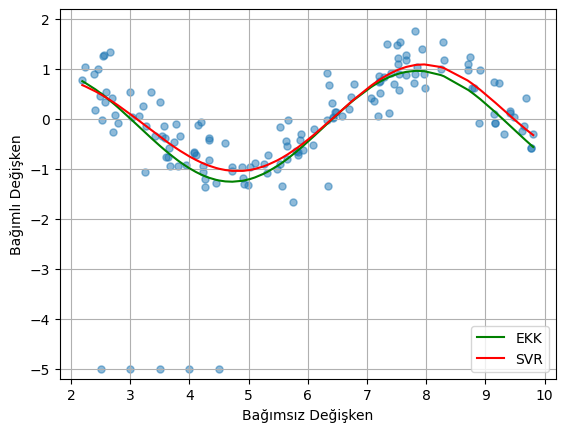

In [11]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.grid()
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [33]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [34]:
svr_rbf = SVR(kernel="rbf",gamma="auto").fit(X_train, y_train)

In [35]:
svr_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Tahmin 

In [36]:
y_pred = svr_rbf.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

473.4445984431814

## Model Tuning

In [38]:
svr_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,100,120,150]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(gamma='auto'),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50, 60, 100,
                               120, 150]})

In [42]:
svr_cv_model.best_params_

{'C': 20}

In [43]:
pd.Series(svr_cv_model.best_params_)[0]

20

In [46]:
svr_tuned = SVR(kernel="rbf",gamma="auto", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [47]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

472.20974524750574

# Çok Katmanlı Algılayıcı(Yapay Sinir ağları)

    İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algorritmalarından birisidir

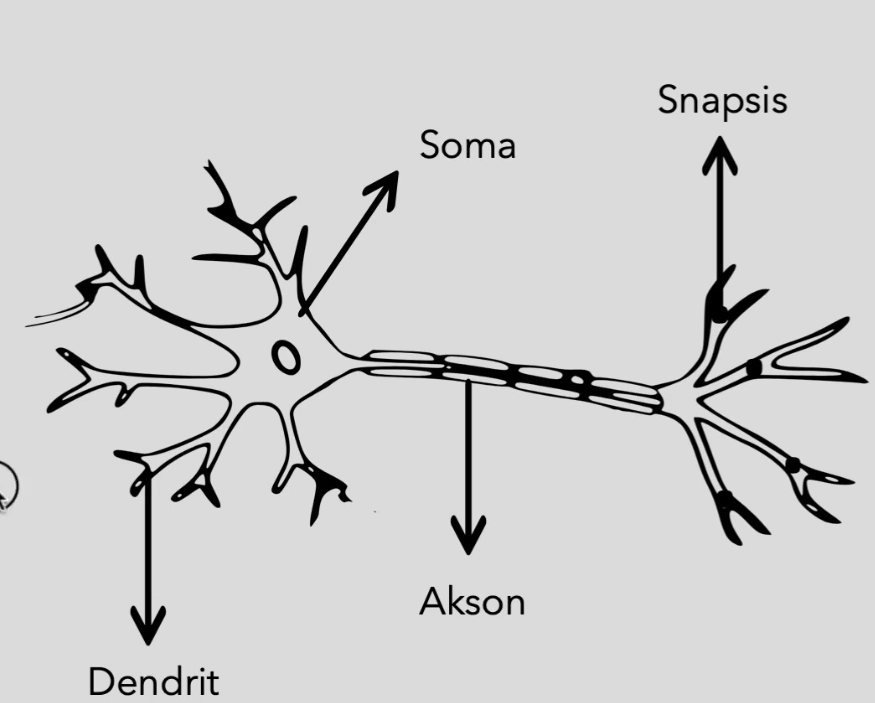

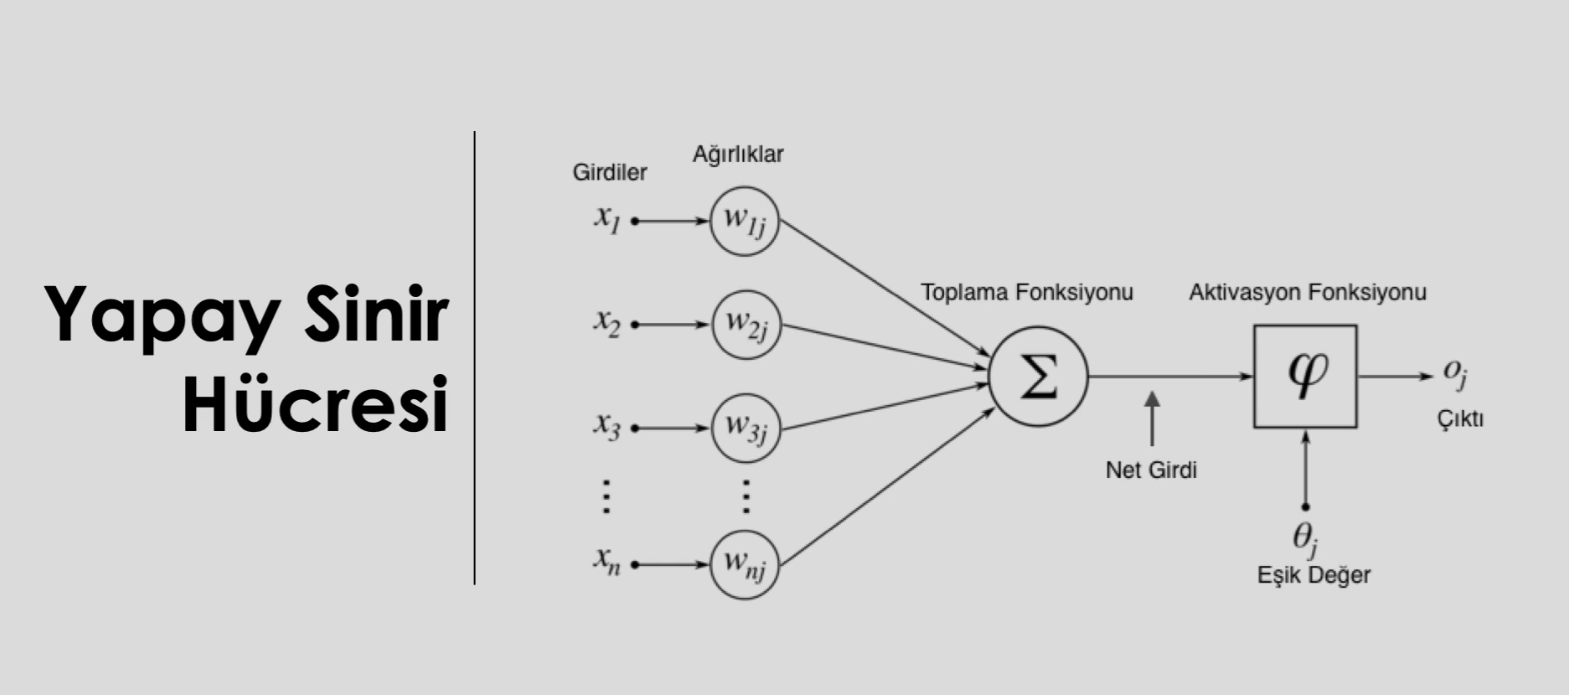


Bu resim, yapay sinir hücresinin yapısını ve işleyişini gösteren bir diyagramdır. Yapay sinir hücresi, yapay sinir ağlarının temel bileşenidir. Yapay sinir ağları, insan beyninin bilgi işleme yeteneğini taklit etmeye çalışan yapay zeka sistemleridir.

Resimdeki yapay sinir hücresinin bölümleri şunlardır:

- Girdiler: Yapay sinir hücresine giren veri noktalarıdır. Örneğin, bir resmin pikselleri veya bir metnin harfleri girdi olabilir.
- Ağırlıklar: Girdilerin önemini belirleyen sayılardır. Ağırlıklar, yapay sinir hücresinin öğrenmesini sağlayan değişkenlerdir. Ağırlıklar, girdilerle çarpılarak ağırlıklı girdiler elde edilir.
- Toplama Fonksiyonu: Ağırlıklı girdilerin toplamını hesaplayan fonksiyondur. Toplam, net girdi olarak adlandırılır.
- Aktivasyon Fonksiyonu: Net girdiyi bir eşik değeriyle karşılaştıran ve yapay sinir hücresinin aktif olup olmadığını belirleyen fonksiyondur. Aktivasyon fonksiyonu, net girdiyi bir çıktı değerine dönüştürür. Örneğin, aktivasyon fonksiyonu, net girdiyi 0 veya 1 olarak sınıflandırabilir.
- Çıktı: Aktivasyon fonksiyonunun sonucudur. Çıktı, yapay sinir hücresinin verdiği cevaptır. Çıktı, başka bir yapay sinir hücresinin girdisi olabilir veya sonuç olarak verilebilir.

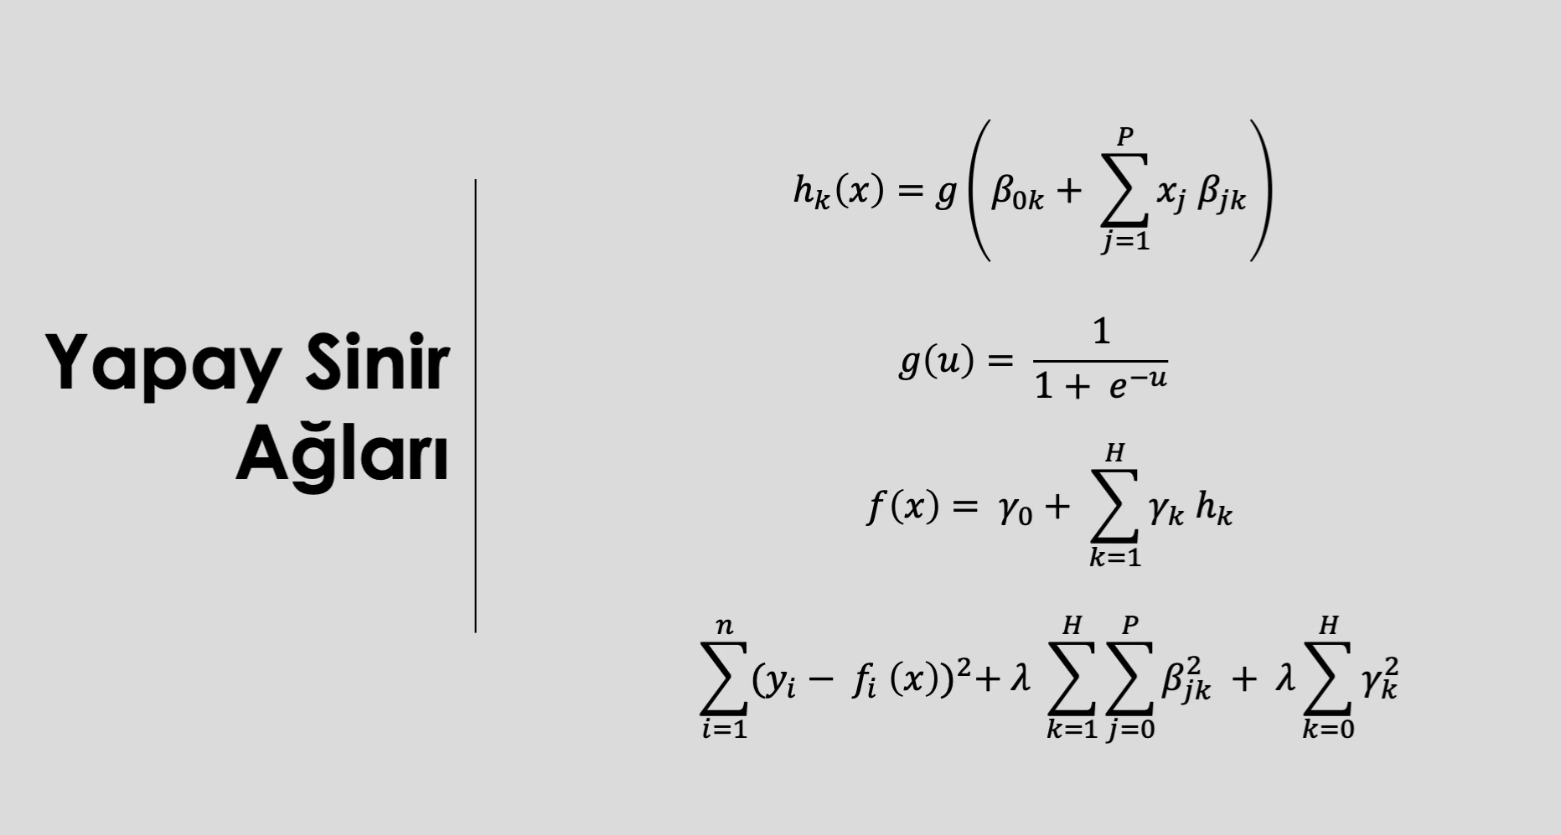

Bu resimde, yapay sinir ağlarının nasıl çalıştığını gösteren bazı matematiksel denklemler vardır. Bu denklemleri en anlaşılır şekilde açıklamaya çalışacağım.

- **hk(x) = g ( β0k + ∑_(j=1)^P xj βjk )**: Bu denklem, gizli katmandaki k'ncı yapay sinir hücresinin çıktısını hesaplar. hk(x), k'ncı yapay sinir hücresinin çıktısıdır. g, aktivasyon fonksiyonudur. β0k, k'ncı yapay sinir hücresinin eşik değeridir. ∑_(j=1)^P xj βjk, giriş katmanındaki j'nci yapay sinir hücresinin çıktısı xj ile k'ncı yapay sinir hücresinin j'nci ağırlığı βjk'nin çarpımının toplamıdır. P, giriş katmanındaki yapay sinir hücresi sayısıdır.

- **g(u) = 1 / (1 + e^-u)**: Bu denklem, aktivasyon fonksiyonunu tanımlar. g(u), u değerine göre yapay sinir hücresinin aktif olup olmadığını belirleyen bir fonksiyondur. e, doğal logaritma tabanıdır. u, net girdidir. Bu fonksiyon, u değeri büyük olduğunda 1'e, küçük olduğunda 0'a yaklaşan bir eğri çizer. Bu şekilde, yapay sinir hücresi, net girdiye göre bir çıktı üretir.

- **f(x) = γ0 + ∑_(k=1)^H γk hk**: Bu denklem, çıkış katmanındaki yapay sinir hücresinin çıktısını hesaplar. f(x), yapay sinir ağının çıktısıdır. γ0, çıkış katmanındaki yapay sinir hücresinin eşik değeridir. ∑_(k=1)^H γk hk, gizli katmandaki k'ncı yapay sinir hücresinin çıktısı hk ile çıkış katmanındaki yapay sinir hücresinin k'ncı ağırlığı γk'nın çarpımının toplamıdır. H, gizli katmandaki yapay sinir hücresi sayısıdır.

- **∑_(i=1)^n (yi - fi(x))^2 + λ ∑_(k=1)^H ∑_(j=0)^P βjk^2 + λ ∑_(k=0)^H γk^2**: Bu denklem, yapay sinir ağının hata fonksiyonunu tanımlar. Hata fonksiyonu, yapay sinir ağının verileri ne kadar iyi öğrendiğini ölçen bir fonksiyondur. Hata fonksiyonu, iki terimden oluşur. Birinci terim, yapay sinir ağının çıktısı fi(x) ile gerçek veri yi arasındaki farkın karesinin toplamıdır. Bu terim, yapay sinir ağının verileri ne kadar iyi tahmin ettiğini gösterir. İkinci terim, yapay sinir ağının ağırlıklarının karesinin toplamıdır. Bu terim, yapay sinir ağının aşırı öğrenmesini önlemek için kullanılır. Aşırı öğrenme, yapay sinir ağının verileri ezberlemesi ve yeni verilere uyum sağlayamaması durumudur. λ, aşırı öğrenmeyi kontrol etmek için kullanılan bir parametredir. n, veri setindeki veri sayısıdır.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [50]:
X_train_scaled = scaler.transform(X_train)

In [51]:
X_test_scaled = scaler.transform(X_test)

In [57]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)

In [58]:
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [59]:
mlp_model.n_layers_

4

In [60]:
mlp_model.hidden_layer_sizes

(100, 20)

## Tahmin

In [61]:
y_pred = mlp_model.predict(X_test_scaled)

In [62]:
np.sqrt(mean_squared_error(y_test, y_pred))

425.6782633815858

## Model Tuning

In [63]:
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [64]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [65]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [66]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [67]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [68]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [69]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [70]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

360.3644348956157

# CART (Classification and Regression Trees)

Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına döüştürmektir 

Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır

CART, Classification And Regression Trees (Sınıflandırma ve Regresyon Ağaçları) anlamına gelen bir kısaltmadır. CART, verileri sınıflandırmak veya tahmin etmek için kullanılan bir yapay zeka yöntemidir. CART, verileri bölerek ve birleştirerek ağaç yapısı oluşturur. Ağacın dalları, verilerin özelliklerine göre ayrılan alt gruplardır. Ağacın yaprakları, verilerin sınıfları veya değerleridir. CART, verileri en iyi ayıran özellikleri seçmek için bir hata fonksiyonu kullanır. CART, hem kategorik hem de sayısal verilerle çalışabilir. CART, verilerdeki karmaşıklığı azaltmak ve anlamak için kullanışlı bir yöntemdir.

In [122]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [96]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [97]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 10)

In [98]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_leaf_nodes=10)
File:        d:\work\veribilimi\.venv\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absol

In [99]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

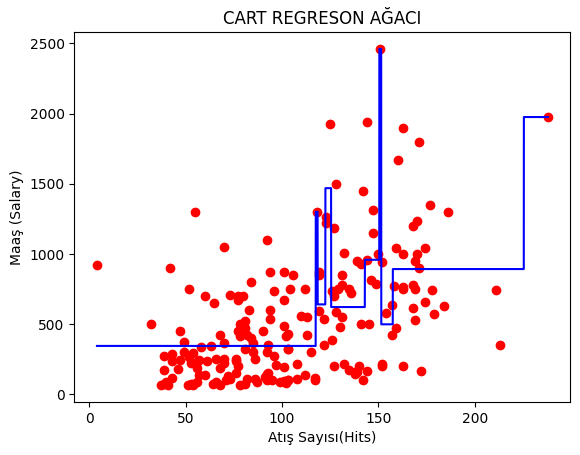

In [100]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [101]:
#!pip install skompiler
#!pip install astor

In [102]:
from skompiler import skompile

In [103]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



## Tahmin

In [104]:
x = [91]

In [105]:
((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else ((((328.88899999999995 if x[0] <= 79.0 else 700.0) if 
    x[0] <= 80.5 else 348.75 if x[0] <= 81.5 else 267.5) if x[0] <= 82.5 else
    600.0 if x[0] <= 83.5 else 600.0) if x[0] <= 84.5 else (331.25 if x[0] <=
    85.5 else (180.0 if x[0] <= 86.5 else 91.5) if x[0] <= 88.5 else 450.0 if
    x[0] <= 90.5 else 125.0) if x[0] <= 91.5 else 411.25 if x[0] <= 92.5 else
    250.0) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else ((100.0 if x[0] <=
    95.5 else 504.1665) if x[0] <= 96.5 else 210.0 if x[0] <= 98.0 else 
    87.5) if x[0] <= 100.0 else 466.0) if x[0] <= 101.5 else 247.5 if x[0] <=
    102.5 else 257.3334) if x[0] <= 103.5 else (750.0 if x[0] <= 105.0 else
    850.0) if x[0] <= 107.0 else 162.5 if x[0] <= 109.0 else (560.0 if x[0] <=
    111.0 else 442.5 if x[0] <= 112.5 else 487.5) if x[0] <= 114.0 else 
    300.0) if x[0] <= 116.0 else 110.0) if x[0] <= 117.5 else ((((1300.0 if
    x[0] <= 118.5 else 773.3333333333334 if x[0] <= 120.5 else 442.5) if x[
    0] <= 122.5 else 1240.0 if x[0] <= 124.0 else 1925.571) if x[0] <= 
    125.5 else (561.25 if x[0] <= 126.5 else (695.2776666666667 if x[0] <= 
    127.5 else 1043.75) if x[0] <= 128.5 else (750.0 if x[0] <= 129.5 else 
    480.0) if x[0] <= 130.5 else 726.6666666666666) if x[0] <= 131.5 else (
    ((611.6665 if x[0] <= 133.5 else 461.0) if x[0] <= 135.5 else 725.0) if
    x[0] <= 137.0 else 152.5 if x[0] <= 138.5 else 555.0 if x[0] <= 139.5 else
    200.0) if x[0] <= 140.5 else 712.5 if x[0] <= 141.5 else 777.5) if x[0] <=
    143.0 else (((1021.6666666666666 if x[0] <= 144.5 else 500.0 if x[0] <=
    145.5 else 815.0) if x[0] <= 146.5 else 1230.0 if x[0] <= 148.0 else 
    787.5 if x[0] <= 149.5 else 1000.0) if x[0] <= 150.5 else 2460.0) if x[
    0] <= 151.5 else (451.6666666666667 if x[0] <= 153.0 else 580.0 if x[0] <=
    155.5 else 530.0) if x[0] <= 157.5 else (((((775.0 if x[0] <= 158.5 else
    759.1665) if x[0] <= 159.5 else 1670.0 if x[0] <= 161.5 else 923.0 if x
    [0] <= 165.5 else 863.0556666666666) if x[0] <= 168.5 else 
    743.3333333333334) if x[0] <= 169.5 else 1118.75 if x[0] <= 170.5 else 
    1350.0) if x[0] <= 171.5 else 165.0 if x[0] <= 173.0 else (849.3335 if 
    x[0] <= 175.5 else 1350.0) if x[0] <= 177.5 else (740.0 if x[0] <= 
    178.5 else 575.0 if x[0] <= 181.5 else 630.0) if x[0] <= 185.0 else 
    1300.0 if x[0] <= 198.5 else 740.0) if x[0] <= 212.0 else 350.0) if x[0
    ] <= 225.5 else 1975.0)

125.0

In [106]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [107]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [108]:
cart_model.predict([[91]])

array([345.20115517])

In [109]:
y_pred =cart_model.predict(X_test)

In [110]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

## Model Tuning

In [123]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(y_test, y_pred))

472.9787260797095

In [125]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [126]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [127]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [128]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [133]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [134]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [135]:
y_pred = cart_tuned.predict(X_test)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865

# Bagged Trees Regresyon

Temeli boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
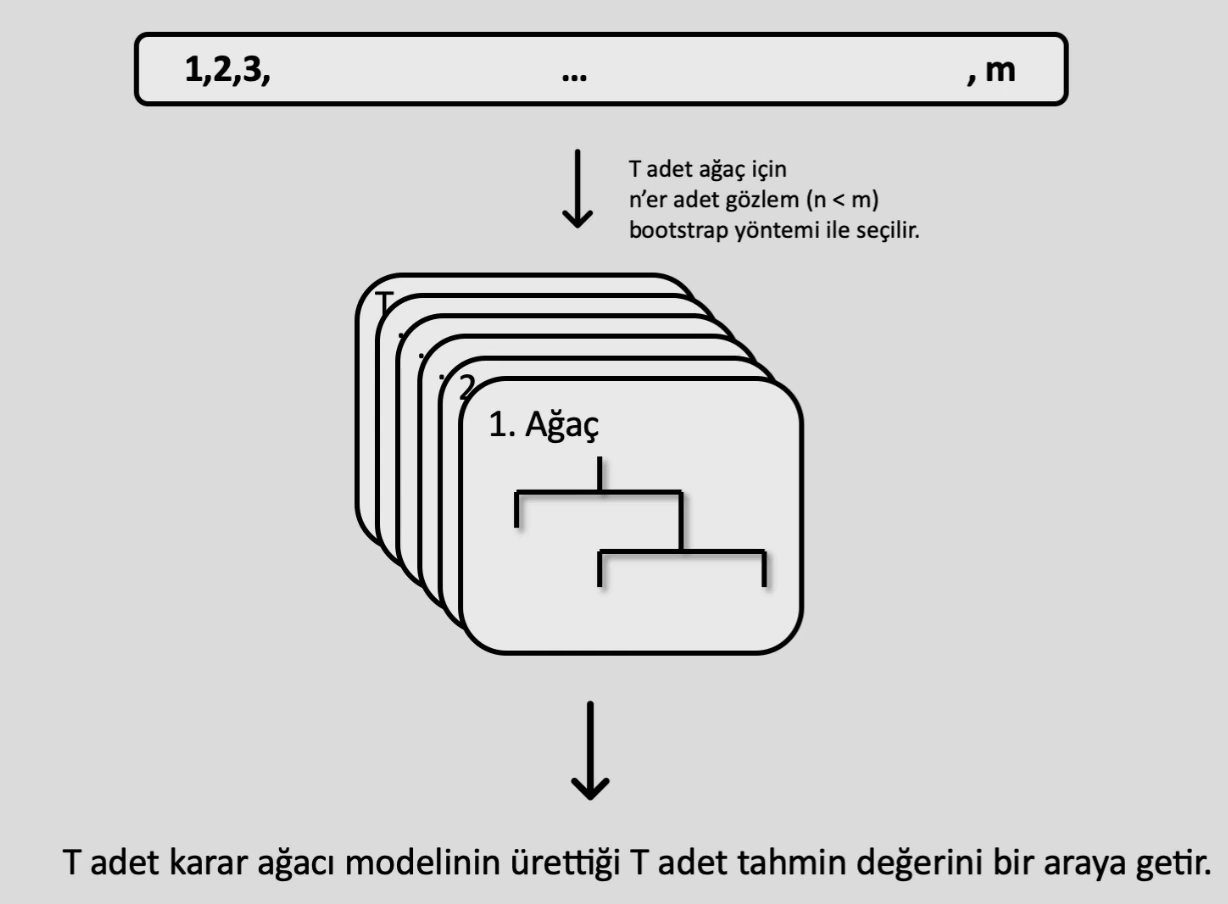

Bagged Trees Regression (Bütünleşik Ağaç Regresyonu), makine öğrenimi alanında kullanılan bir ensemble öğrenme yöntemidir. Bagged Trees, "Bootstrap Aggregating" kısaltması olan "Bagging" tekniğini kullanır. Bagging, veri setinden rastgele örneklem alarak farklı alt veri kümeleri oluşturur ve her bir alt küme üzerinde ayrı ayrı öğrenme modeli eğitir. Sonuçta, bu modellerin tahminleri bir araya getirilerek daha güçlü ve genelleyici bir model elde edilir.

Bagged Trees Regression'da, öğrenme modeli olarak genellikle karar ağaçları (decision trees) kullanılır. Her bagging iterasyonunda, veri setinden rastgele örneklenen alt veri kümesi üzerinde bir karar ağacı eğitilir. Bu süreç, belirli bir sayıda ağaç oluşturulana kadar devam eder.

Her bir ağaç, veri setindeki örnekleri öğrenerek ve buna dayanarak bir tahmin modeli oluşturarak çalışır. Ancak, her bir ağaç farklı örneklem verilerle eğitildiği için, her bir ağacın güçlü ve zayıf yönleri farklı olabilir.

Ensemble modelin tahmin yapması için, her bir ağacın tahminleri ortalaması (regresyon için) veya oybirliği prensibi (sınıflandırma için) kullanılır. Bu sayede, farklı modellerin güçlü yanları birleştirilirken, zayıf yanları birbirini dengeleyerek daha genel bir model elde edilir.

Bagged Trees Regression, özellikle aşırı öğrenmeye karşı dirençli olması ve genelde iyi performans göstermesi nedeniyle tercih edilen bir yöntemdir.

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
bag_model = BaggingRegressor(bootstrap_features = True)  # Boostrap örneklerini gözlemlemek için True yapılır 
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [6]:
bag_model.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': True,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
bag_model.n_estimators

10

In [12]:
for est in  bag_model.estimators_:
    print(est.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 301568444, 'splitter': 'best'}
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 58737045, 'splitter': 'best'}
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1419170692, 'splitter': 'best'}
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split':

In [13]:
bag_model.estimators_samples_

[array([147, 192, 162,  16,  91,  43, 172, 195, 189,  69, 195, 186,  82,
        127,  69, 187, 145,  20, 164,   7,  37,  80,  59,  10, 179, 163,
         99,  90, 186, 148, 154,  16, 138,  46, 106,  50,  94, 164, 112,
         60,  58,  99, 149,   5,  91,  18, 175,  72,  47,  80, 118, 115,
        196,  93,  95, 118,  67,  35, 177,  65, 176, 112, 138, 133,  72,
        167,  62, 106,  12,  95, 162,  17,  97, 111,   2, 148,   4,  22,
        142, 106,  54, 162,  35,  97, 159,  44, 136,  73,  52, 111,  88,
        155,  77, 196, 125, 130, 138,  72,  99,  55, 146, 112,  42, 175,
         91, 132, 111, 140,  45, 154,  40,  67,  23, 158, 153, 107,  53,
        187,  78, 193,  15,  61, 106,  21,   1,  85,   6,  72, 180,   7,
        170, 156,  21,  48, 169,  13,  91,  89,  11, 142,  57,  44,  61,
        156,   1, 110,  80, 127, 147,   8, 195, 111, 181, 159, 136, 101,
          8, 143, 113,  87, 147,  46,  67,  72, 113, 130, 138,  18,  37,
        112,   7,  11,  36,  34,  98, 171,  94,   6

In [14]:
bag_model.estimators_features_

[array([ 6, 12,  3,  2,  8, 14, 11, 16,  9, 11,  7, 12,  6, 13,  7, 11,  4,
         4, 12]),
 array([ 6, 16,  1,  1, 12,  2, 17,  0,  6,  8,  1, 16, 15,  6, 12,  6,  6,
         8,  2]),
 array([ 4, 11,  0, 15, 10, 11,  7,  2,  3, 11, 11,  6, 12,  7,  9, 10, 13,
        13, 16]),
 array([ 9, 13, 17,  8,  9,  6,  0, 18,  6,  3,  7, 18,  6, 10, 13, 11,  1,
         4,  2]),
 array([10, 17,  3, 18,  8, 12,  7,  5,  8,  7,  0, 15,  6,  4, 14,  7, 17,
        12,  1]),
 array([16, 11,  7,  4, 12, 15,  1,  6, 10,  4,  8,  2,  8,  4,  1, 15,  7,
         0, 10]),
 array([ 1, 14,  6,  5, 15, 10, 16, 17, 18, 13,  8, 17,  6,  1,  6,  3, 18,
        17, 10]),
 array([17, 17, 17, 18,  0, 15,  6, 18, 12,  3, 12,  7,  0,  4,  7, 18,  8,
        12,  5]),
 array([10,  8,  6, 18, 14,  0, 12, 10,  9,  6,  3, 10, 15,  8, 16, 14,  2,
         8, 10]),
 array([15, 11,  0,  3, 17,  9,  1, 13,  3,  4, 15,  8,  4, 17,  1, 13,  9,
         4,  6])]

In [17]:
bag_model.estimators_[1].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 58737045,
 'splitter': 'best'}

## Tahmin

In [18]:
y_pred = bag_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

369.5383024697543

In [20]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

455.7721297571614

In [22]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

474.16218682524016

## Model Tuning

In [24]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [25]:
bag_params = {"n_estimators": range(2,20)}

In [26]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [27]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [28]:
bag_cv_model.best_params_

{'n_estimators': 17}

In [30]:
bag_tuned = BaggingRegressor( n_estimators = bag_cv_model.best_params_["n_estimators"], random_state = 45)

In [31]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=17, random_state=45)

In [32]:
y_pred = bag_tuned.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.0060534136818

# Random Forests

Temeli birden ok karar agacinin ürettigi tahminlerin bir araya getirilerekn deerlendirilmesine davanir.

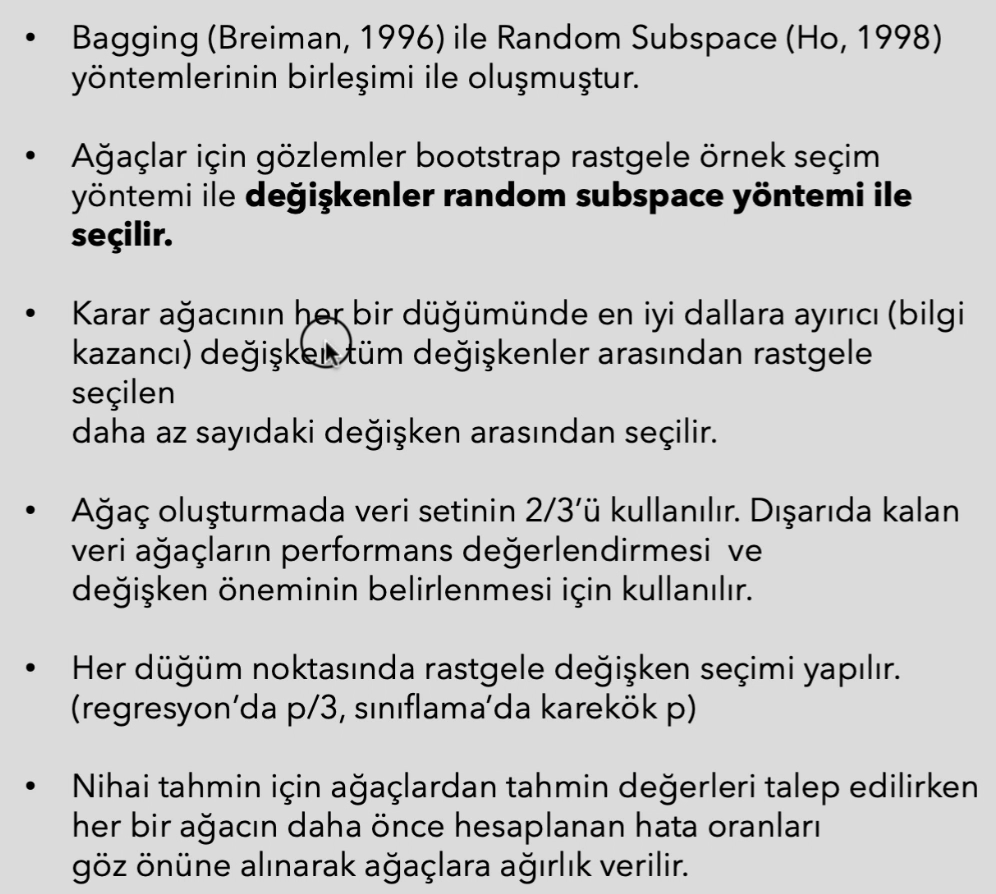

In [34]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf_model = RandomForestRegressor(random_state = 42,criterion="mean_squared_error") # rastgeleliği sabitlemek için kullanılır 

In [37]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Tahmin

In [39]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [42]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [43]:
rf_model = RandomForestRegressor(random_state = 42,criterion="mean_squared_error")

In [54]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1,verbose=True)

# n_jobs=-1: Bu parametre, çapraz doğrulama sırasında kullanılacak iş parçacığı sayısını belirtir. -1 değeri, tüm iş parçacıklarının kullanılmasını ifade eder, bu da işlemi hızlandırabilir.

In [55]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]},
             verbose=True)

In [56]:
rf_cv_model.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 1.0,
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(random_state=42),
 'n_jobs': -1,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'max_features': [3, 5, 10, 15],
  'n_estimators': [100, 200, 500, 1000, 2000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': True}

In [57]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [64]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200,
                                 verbose=True)

In [65]:
rf_tuned.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200,
                      verbose=True)

In [66]:
y_pred = rf_tuned.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.19937019748306

In [68]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

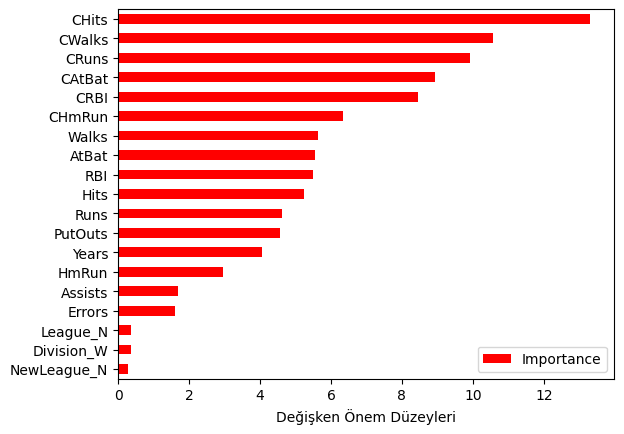

In [69]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

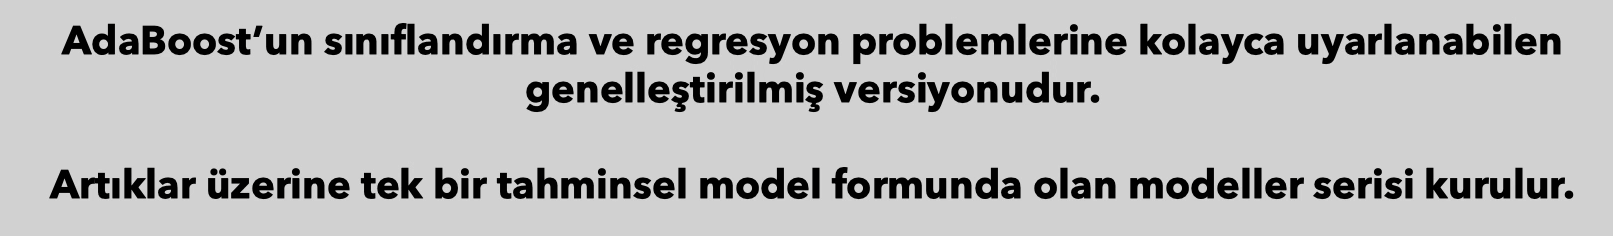

Gradient Boosting Machines (GBM), makine öğrenimi alanında yaygın olarak kullanılan bir topluluk öğrenme algoritmasıdır. GBM, zayıf öğrenicileri (genellikle karar ağaçları) bir araya getirerek güçlü bir model oluşturur. Çalışma mantığı şu adımlardan oluşur:

- Zayıf Öğrenicinin Oluşturulması:
İlk olarak, veri seti üzerinde bir zayıf öğrenici (genellikle karar ağacı) oluşturulur. Bu model, veri setinin karmaşıklığına uyum sağlayabilecek düzeyde bir tahmin yapar.

- Hata Hesaplama:
İlk öğrenici ile yapılan tahminler, gerçek değerlerle karşılaştırılarak bir hata (residual) hesaplanır. Bu hata, gerçek değerler ile tahminler arasındaki farkı gösterir.

- Hatanın Yeni Öğrenici ile Azaltılması:
Hata, bir sonraki zayıf öğrenicinin odaklanması için kullanılır. Yeni öğrenici, önceki öğrenicinin hatalarına odaklanarak modelin genel hatasını azaltmaya çalışır.

- Aşamalı Olarak Modelin Güçlendirilmesi:
Bu adımlar aşamalı olarak tekrarlanır. Her bir öğrenici, önceki modellerin hatalarına odaklanarak modelin performansını artırmaya çalışır. Bu, adım adım modelin genel hatasını düşürür.

- Toplam Tahmin:
Tüm öğrenicilerin tahminleri bir araya getirilir ve toplu bir tahmin yapılır. Genellikle, her bir öğrenicinin katkısı bir ağırlık ile çarpılarak toplam tahmin elde edilir.

Gradient Boosting'in temel fikri, her bir öğrenicinin, önceki modellerin yapamadığı hatalara odaklanarak modelin genel performansını iyileştirmesidir. Bu, birçok zayıf öğreniciyi bir araya getirerek güçlü ve genelleme yeteneği yüksek bir model elde etmenin etkili bir yoludur.

Gradient Boosting, regresyon ve sınıflandırma problemleri için başarıyla kullanılır ve popüler kütüphanelerde (örneğin, XGBoost, LightGBM, scikit-learn'deki GradientBoostingClassifier/Regressor) bulunmaktadır.

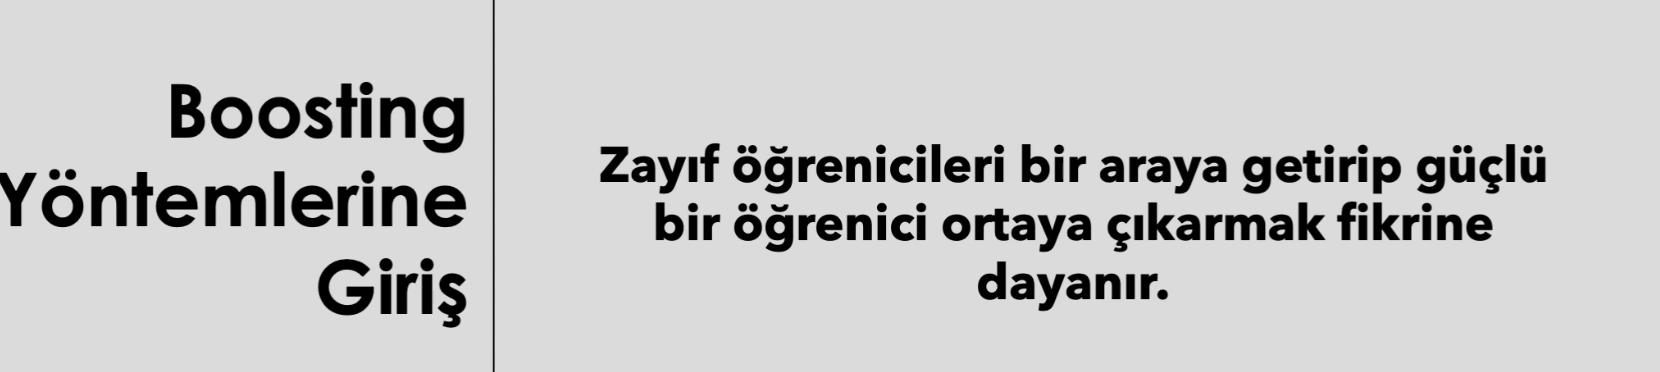

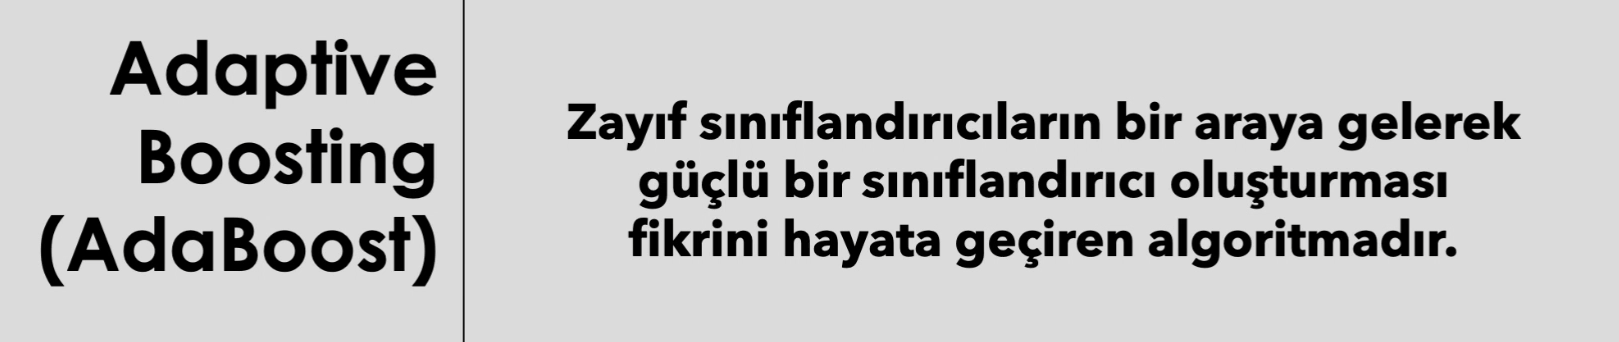

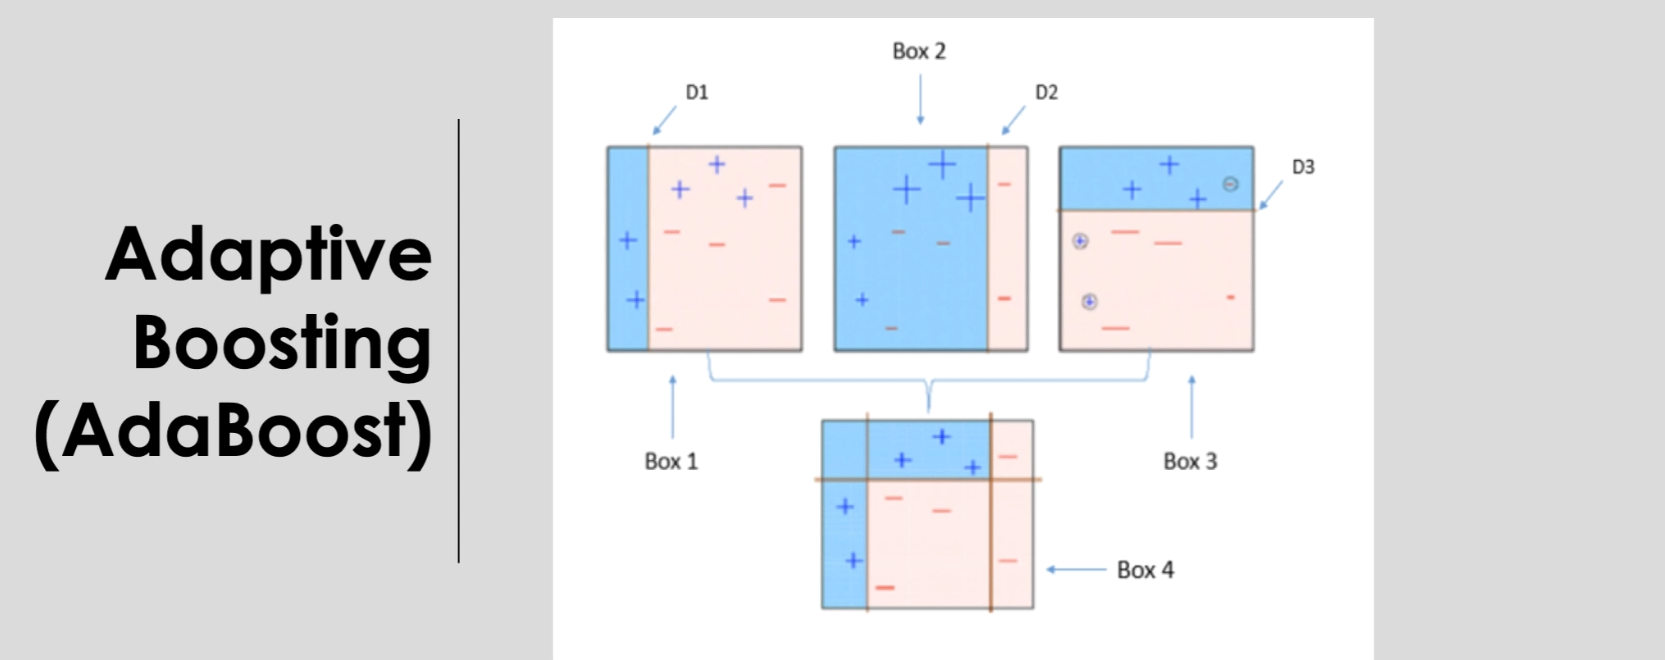

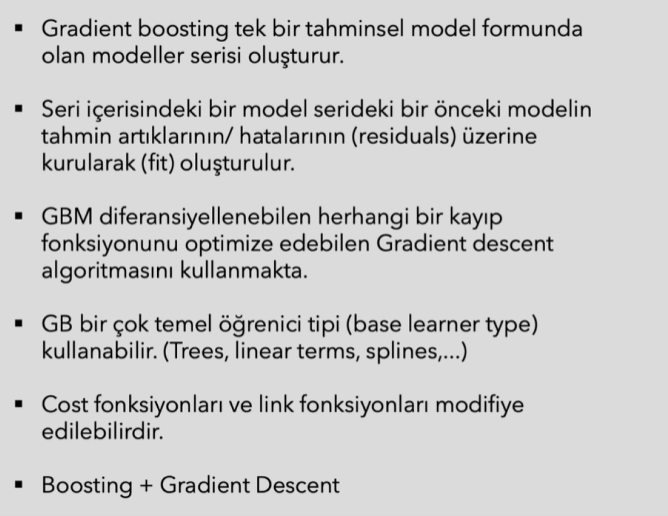

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [72]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Tahmin

In [73]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

353.3547937997903

## Model Tuning

In [74]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [75]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


KeyboardInterrupt: 

In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

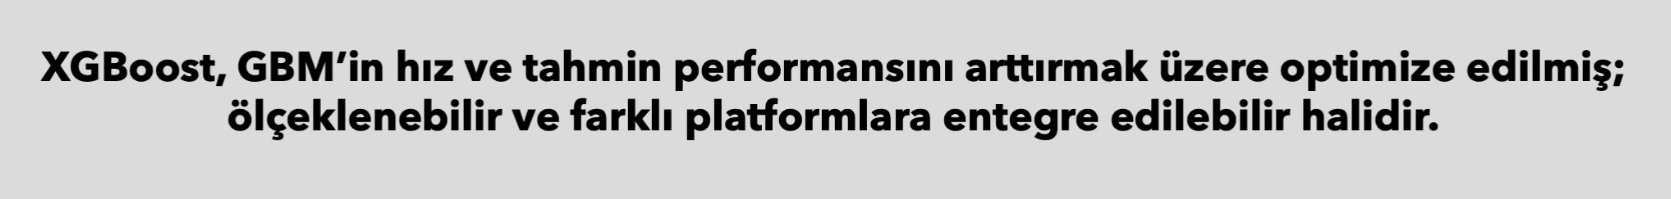

XGBoost (eXtreme Gradient Boosting), Gradient Boosting algoritmalarının bir türüdür ve regresyon ve sınıflandırma problemleri için yaygın olarak kullanılan bir topluluk öğrenme algoritmasıdır. XGBoost, özellikle büyük veri setleri üzerinde yüksek performans sağlamak ve overfitting'e karşı dirençli olmak amacıyla tasarlanmıştır. İşte XGBoost'un çalışma mantığına dair temel adımlar:

- Zayıf Öğrenicilerin (Genellikle Karar Ağaçları) Oluşturulması:

İlk olarak, bir zayıf öğrenici olan bir karar ağacı oluşturulur. Bu ağaç, veri setini kullanarak bir tahmin yapar.

- Hata Hesaplama:

Tahminlerle gerçek değerler arasındaki hata hesaplanır. Bu hata, önceki tahminlerle gerçek değerler arasındaki farkı temsil eder.

- Hatanın Yeni Öğrenici ile Azaltılması:

Hata, bir sonraki zayıf öğrenici için odak noktası olur. Yeni öğrenici, önceki öğrenicilerin hatalarına odaklanarak modelin genel hatasını azaltmaya çalışır.

- Ağaçların Birleştirilmesi:

Her yeni öğrenici, öncekilerle birleştirilir ve genel model güncellenir. Bu, adım adım modelin genel performansını artırır.

- Regularizasyon ile Kontrol Edilen Genişleme:

XGBoost, modelin karmaşıklığını kontrol etmek için L1 (Lasso) ve L2 (Ridge) regularization tekniklerini içerir. Bu, aşırı uydurmaya (overfitting) karşı dirençli modeller elde etmeye yardımcı olur.

- Gradient Boosting ile Hızlı Öğrenme:

XGBoost, Gradient Boosting'in hızlandırılmış bir versiyonudur. Özellikle, hataların azaltılması sırasında gradyan inişini kullanarak öğrenmeyi hızlandırır.

XGBoost, performans, hız ve düşük bellek tüketimi gibi avantajlarıyla bilinir. Ayrıca, eksik veriye dayanıklıdır ve birçok özellik mühendisliği özelliğini destekler. Bu özellikleri sayesinde birçok veri bilimi yarışmasında ve endüstriyel uygulamada başarıyla kullanılmıştır.

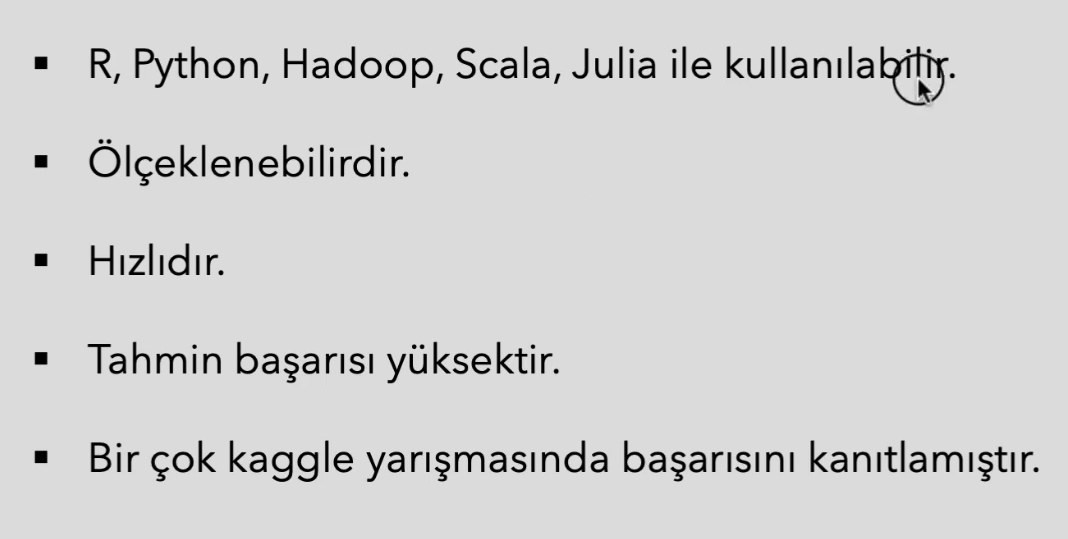

In [77]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [78]:
#!pip install xgboost

In [79]:
import xgboost as xgb

In [80]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [81]:
from xgboost import XGBRegressor

In [82]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [83]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

## Model Tuning

In [84]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [86]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [87]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [90]:
xgb_tuned = XGBRegressor(colsample_bytree =  0.4, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [91]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

343.6101991802883

# Light GBM


LightGBM, Gradient Boosting algoritmalarından biridir ve özellikle büyük veri setleri üzerinde hızlı ve yüksek performanslı bir şekilde çalışan bir topluluk öğrenme algoritmasıdır. LightGBM, Microsoft tarafından geliştirilmiştir ve özellikle düşük bellek kullanımı ve paralel hesaplama yetenekleriyle bilinir

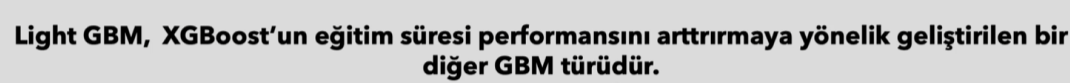

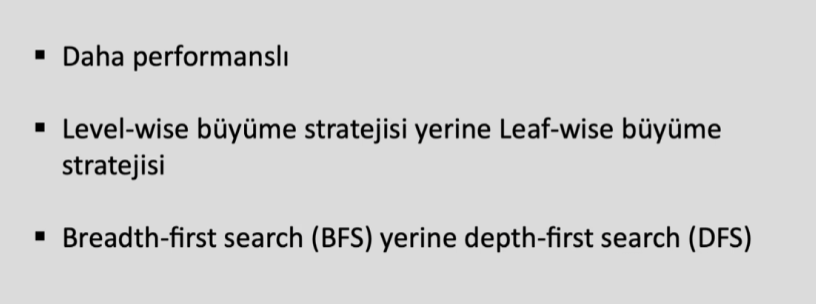

In [92]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [94]:
#!pip install lightgbm

In [95]:
from lightgbm import LGBMRegressor

In [96]:
from lightgbm import LGBMRegressor

In [97]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## Tahmin

In [98]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [100]:
lgbm_model

LGBMRegressor()

In [101]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [102]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


KeyboardInterrupt: 

In [ ]:
lgbm_cv_model.best_params_

In [103]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [104]:
y_pred = lgbm_tuned.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [105]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

# CatBoost

CatBoost, özellikle kategorik özelliklere odaklanan ve performansı artırmak için bir dizi içsel optimizasyon ve hızlandırma yöntemi sunan bir gradient boosting kütüphanesidir. Kullanımı kolaydır ve geniş bir uygulama yelpazesine sahiptir, özellikle tablo verileri üzerinde iyi performans gösterir.

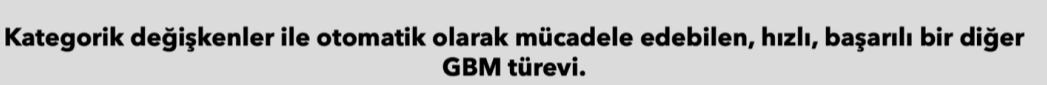

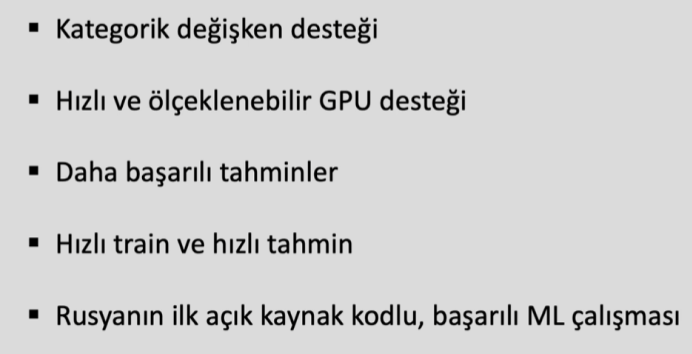

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [1]:
#!pip install catboost

  Using cached catboost-1.2.2-cp38-cp38-win_amd64.whl.metadata (1.2 kB)
Using cached catboost-1.2.2-cp38-cp38-win_amd64.whl (101.1 MB)



[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from catboost import CatBoostRegressor

In [5]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 53.3ms	remaining: 53.3s
1:	learn: 431.3923642	total: 54.4ms	remaining: 27.1s
2:	learn: 424.8820360	total: 55.4ms	remaining: 18.4s
3:	learn: 418.2514904	total: 56.4ms	remaining: 14s
4:	learn: 412.6394021	total: 57.9ms	remaining: 11.5s
5:	learn: 406.6247020	total: 59.1ms	remaining: 9.78s
6:	learn: 400.5321206	total: 60.2ms	remaining: 8.54s
7:	learn: 394.6683437	total: 61.3ms	remaining: 7.6s
8:	learn: 388.2496484	total: 62.3ms	remaining: 6.86s
9:	learn: 382.9448842	total: 63.3ms	remaining: 6.27s
10:	learn: 377.2600080	total: 64.6ms	remaining: 5.81s
11:	learn: 372.4829606	total: 65.7ms	remaining: 5.41s
12:	learn: 366.6823437	total: 66.7ms	remaining: 5.06s
13:	learn: 362.6076230	total: 67.8ms	remaining: 4.78s
14:	learn: 358.0107745	total: 68.8ms	remaining: 4.51s
15:	learn: 353.2802665	total: 70.2ms	remaining: 4.32s
16:	learn: 348.5646265	total: 71.1ms	remaining: 4.11s
17:	learn: 343.6407912	total: 72.2ms	remaining: 3.94s
18:	learn: 

## Tahmin

In [6]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [7]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [8]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [9]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))